# Developing model with Boosting technique to analyse the titanic data set  

In [2]:
#importing basic library 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#laoding the dataset titanic.csv
df=pd.read_csv("titanic.csv")

In [4]:
#first look to dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#here we can see we have null values in column ("sex","cabin","embarked")
#before dealing with null values let first check no. of records in data set

In [7]:
df.shape

(891, 12)

In [8]:
#here age have null value less than 50% of whole dataset 
#and cabin have greater than 50% of null values 
#so here we can fill null value in age column by applying mean,median technique 
#but for now we will not fill null values in cabin column as null value is greater than 50%

In [9]:
#filling null values in age column with mean of age 
m=df['Age'].mean()
df['Age'].fillna(m,inplace=True)

In [10]:
#for embarked if we check dtypes is object 
df['Embarked'].dtypes
#so to fill null values we will take mode (highest frequency)
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
df['Embarked'].fillna('S',inplace=True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

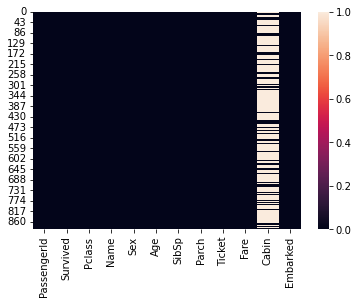

In [13]:
#visualizing null values 
sb.heatmap(df.isnull())

In [14]:
#checking duplicated values
df.duplicated().sum()

0

In [15]:
#checking overall information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
#before moving futher we will remove unwanted data as per domain knwoledge
df.drop(['PassengerId','Name'],axis=1,inplace =True)

In [17]:
#through mean and median of every column we can understand skewness in data (if thier is difference in both)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#here few columns are in object type and machine understands only numeric type 
#so here we have to apply labelencoder for converting string value into numeric value 

In [19]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(['int64','float64'])

In [20]:
#check dtypes of both data frame
df_cat.dtypes

Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [21]:
df_num.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [22]:
#now appyling LabelEncoder on object type data
from sklearn.preprocessing import LabelEncoder

In [23]:
#creating object of labelencoder class
le=LabelEncoder()

In [24]:
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [25]:
df_cat.head()  #here we can see all the values are converted into numeric type


,Sex,Ticket,Cabin,Embarked
0,1,523,147,2
1,0,596,81,0
2,0,669,147,2
3,0,49,55,2
4,1,472,147,2


In [26]:
df_cat.dtypes

Sex         int32
Ticket      int32
Cabin       int32
Embarked    int32
dtype: object

<AxesSubplot:>

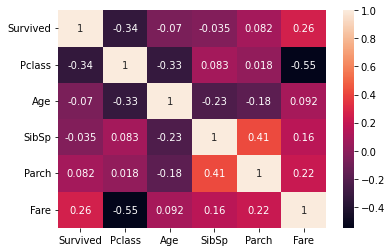

In [27]:
#checking correlation between input and output 
sb.heatmap(df.corr(),annot=True)

In [28]:
#here we can see correlation is not good with respect to output 
#we can classification algorithm to identify best features 

In [29]:
#now concating both the dataframe df_cat and df_num into df_new
df_new=pd.concat([df_cat,df_num],axis=1)

In [30]:
df_new.head()

,Sex,Ticket,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,523,147,2,0,3,22.0,1,0,7.2500
1,0,596,81,0,1,1,38.0,1,0,71.2833
2,0,669,147,2,1,3,26.0,0,0,7.9250
3,0,49,55,2,1,1,35.0,1,0,53.1000
4,1,472,147,2,0,3,35.0,0,0,8.0500


In [31]:
df_new.dtypes

Sex           int32
Ticket        int32
Cabin         int32
Embarked      int32
Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [32]:
#let select input and output to perform training and testing
X=df_new.drop("Survived",axis=1)  #input
Y=df_new['Survived']   #output

In [33]:
X.columns

Index(['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [34]:
#performing train test split
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [36]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((623, 9), (268, 9), (623,), (268,))

In [37]:
#now applying standardscaler on input data to make all the value in one unit
from sklearn.preprocessing import StandardScaler

In [38]:
#creating object of standardscaler class
ss=StandardScaler()

In [39]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [40]:
X_train

array([[-1.36783323, -0.86336997,  0.43890608, ..., -0.47149154,
        -0.4764597 , -0.35793161],
       [-1.36783323,  1.1772294 ,  0.43890608, ...,  0.4915879 ,
        -0.4764597 , -0.1527973 ],
       [ 0.73108328,  0.05208689,  0.43890608, ..., -0.47149154,
        -0.4764597 , -0.49901694],
       ...,
       [ 0.73108328,  1.41248647,  0.43890608, ..., -0.47149154,
        -0.4764597 ,  0.91138918],
       [-1.36783323,  1.69888638,  0.43890608, ..., -0.47149154,
        -0.4764597 , -0.50645119],
       [ 0.73108328,  0.86525807,  0.43890608, ..., -0.47149154,
        -0.4764597 , -0.49570184]])

In [41]:
#creating function 
def create_model(model):
    #trainig model with 70% of data
    model.fit(X_train,Y_train)
    #testing model with 30% data
    Y_pred=model.predict(X_test)
    
    #generate report
    print(classification_report(Y_test,Y_pred))
    plot_confusion_matrix(model,X_test,Y_test)
    plt.title("Confusion matrix")
    plt.show()
    return model
    

In [42]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report

# Logistic Regression

In [43]:
#giving model to LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression

In [44]:
#creating object of logistic regression class
lr=LogisticRegression()

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       153
           1       0.76      0.70      0.73       115

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.77       268



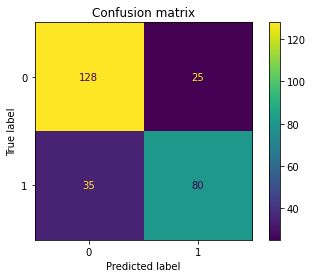

In [45]:
#calling the function
lr=create_model(lr)

# DecisionTreeClassifier(gini index)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       153
           1       0.79      0.69      0.73       115

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



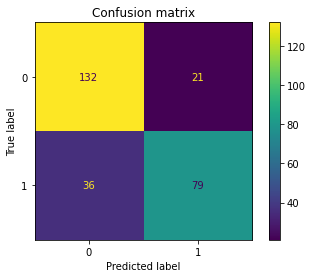

In [46]:
#perform DecisionTreeClassifier(gini index)
from sklearn.tree import DecisionTreeClassifier
#creating an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method
#calling the function
dt=create_model(dt)

In [47]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.321008
1,Ticket,0.169587
2,Fare,0.159156
3,Age,0.124372
4,Pclass,0.083790
5,Cabin,0.061402
6,Embarked,0.036496
7,SibSp,0.035415
8,Parch,0.008773


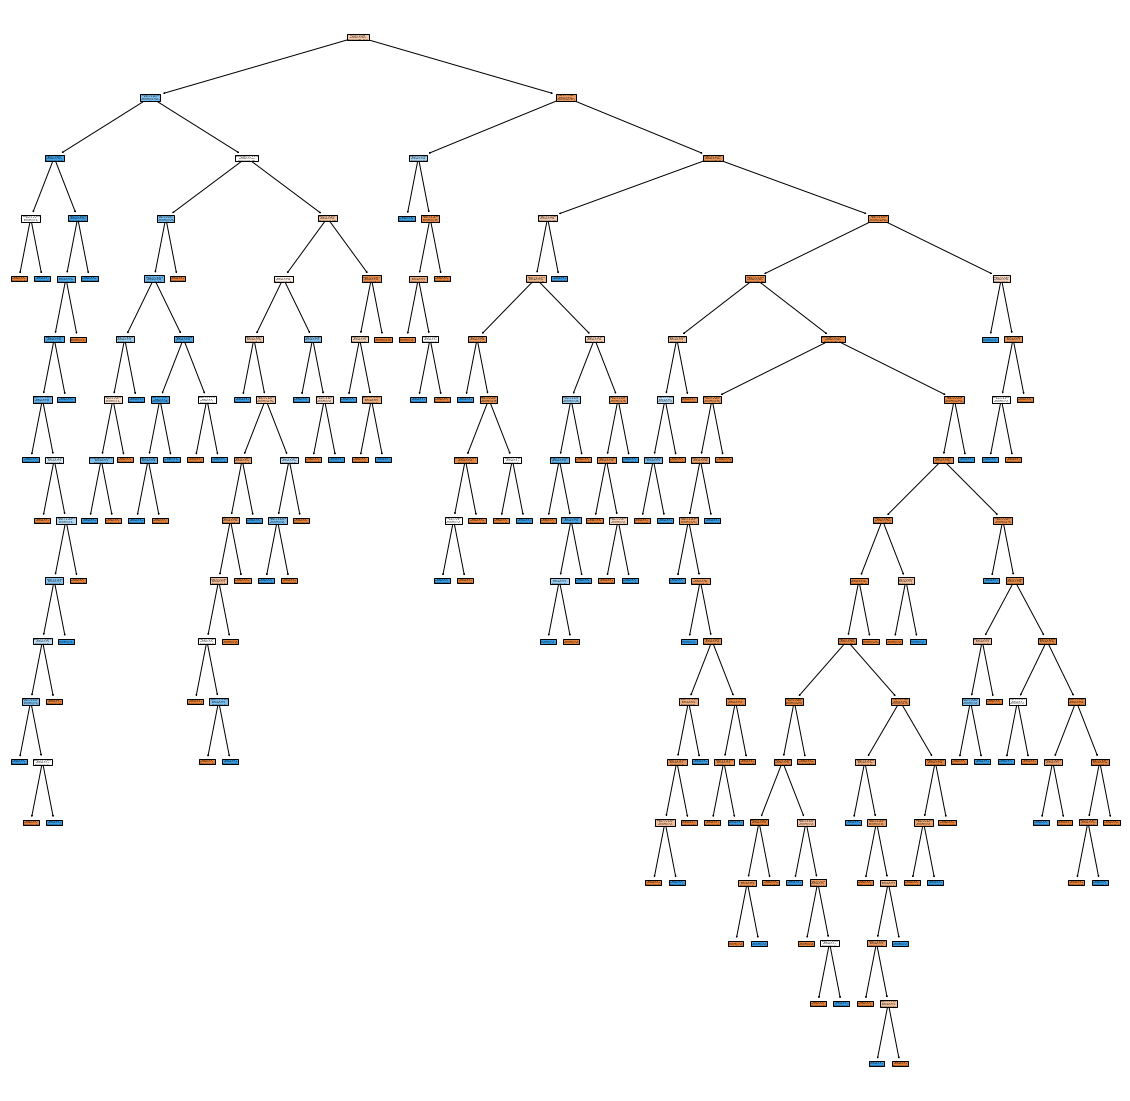

In [48]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# max_depth(gini index)

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       153
           1       0.84      0.47      0.60       115

    accuracy                           0.74       268
   macro avg       0.77      0.70      0.70       268
weighted avg       0.76      0.74      0.72       268



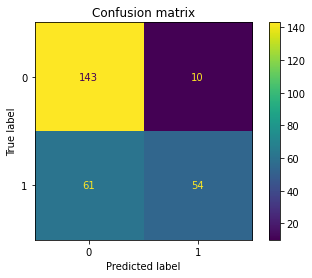

In [49]:
#to see with max_depth (pruning technique)
dt1=DecisionTreeClassifier(random_state=1,max_depth=2)  
#call function
dt1=create_model(dt1)

In [50]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.72743
1,Pclass,0.17818
2,Age,0.09439
3,Ticket,0.00000
4,Cabin,0.00000
5,Embarked,0.00000
6,SibSp,0.00000
7,Parch,0.00000
8,Fare,0.00000


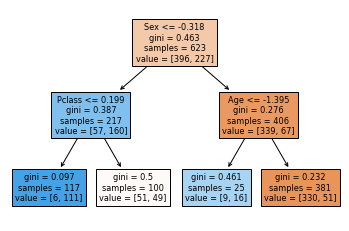

In [51]:
#create a tree
from sklearn import tree
features=X.columns
#plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# min_samples_leaf(gini index)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       153
           1       0.86      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268



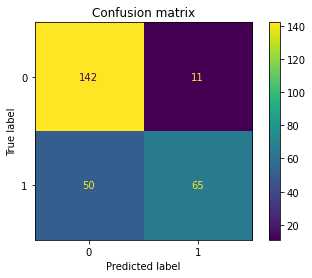

In [52]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call function
dt2=create_model(dt2)

In [53]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.697579
1,Pclass,0.170868
2,Cabin,0.062530
3,Age,0.036337
4,Fare,0.022328
5,Ticket,0.010357
6,Embarked,0.000000
7,SibSp,0.000000
8,Parch,0.000000


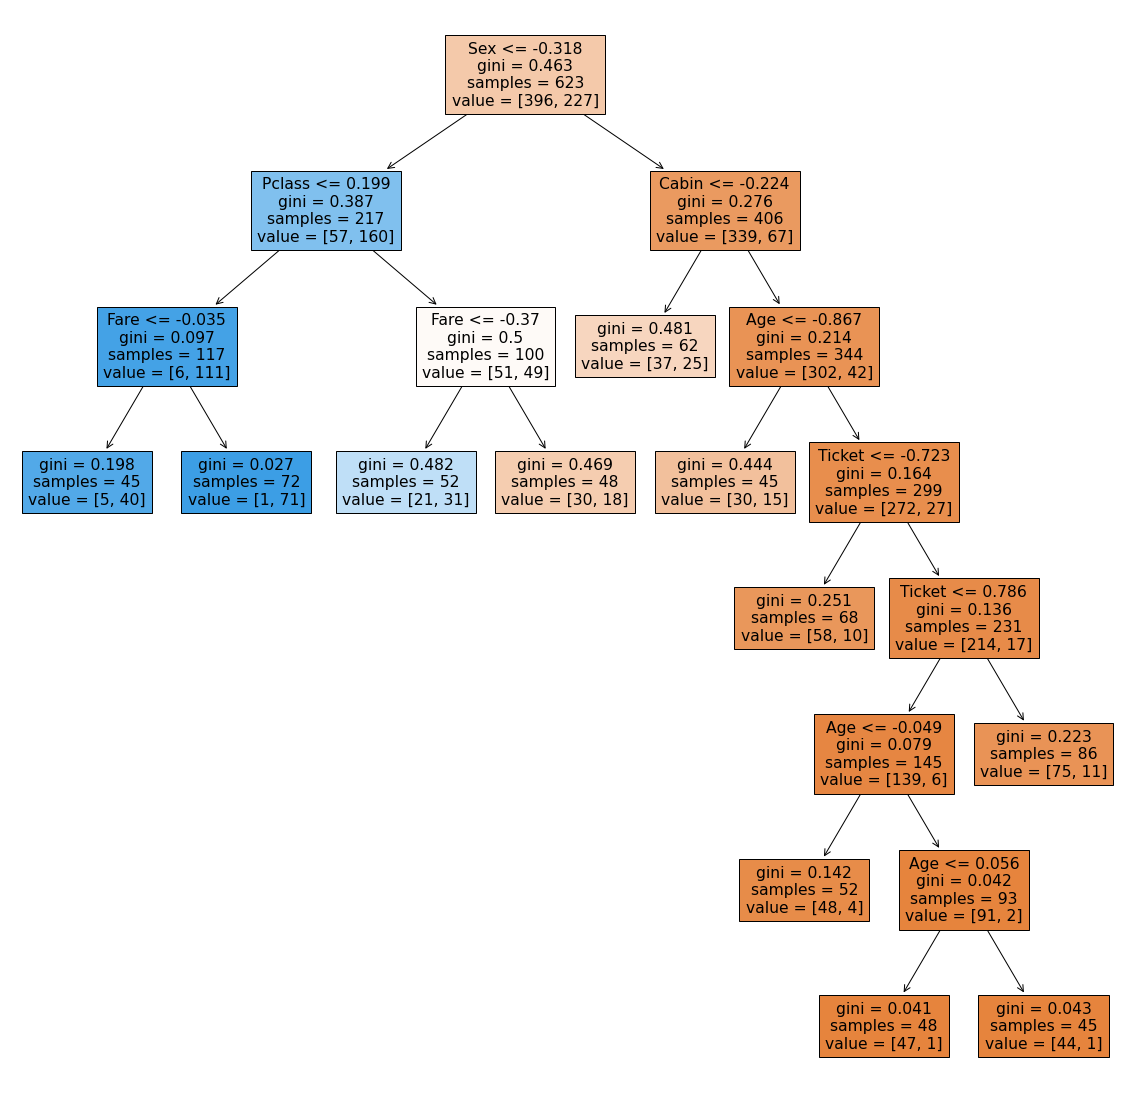

In [55]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Entropy method

              precision    recall  f1-score   support

           0       0.78      0.86      0.81       153
           1       0.78      0.67      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



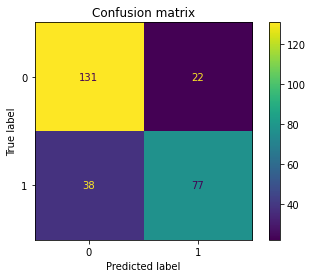

In [56]:
#first create object of DecisionTreeClassifier and pass criterion='entropy' as an paramter
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
#call function
dt=create_model(dt)

In [57]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.249161
1,Ticket,0.195285
2,Age,0.187152
3,Fare,0.121546
4,Pclass,0.081524
5,Cabin,0.061337
6,Embarked,0.043624
7,SibSp,0.042549
8,Parch,0.017822


# max_depth(entropy)

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       153
           1       0.84      0.47      0.60       115

    accuracy                           0.74       268
   macro avg       0.77      0.70      0.70       268
weighted avg       0.76      0.74      0.72       268



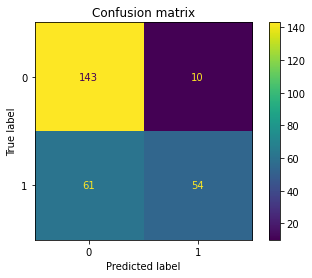

In [58]:
#applying pruning technique
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=2)
#call function
dt1=create_model(dt1)

In [59]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.681746
1,Pclass,0.214245
2,Age,0.104008
3,Ticket,0.000000
4,Cabin,0.000000
5,Embarked,0.000000
6,SibSp,0.000000
7,Parch,0.000000
8,Fare,0.000000


# min_samples_leaf(entropy)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       153
           1       0.94      0.43      0.60       115

    accuracy                           0.75       268
   macro avg       0.82      0.71      0.71       268
weighted avg       0.80      0.75      0.72       268



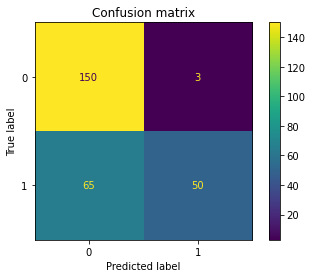

In [60]:
#create object
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=94,criterion='entropy') 
dt2=create_model(dt2)

In [61]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.694045
1,Pclass,0.218110
2,Fare,0.057184
3,Age,0.030661
4,Ticket,0.000000
5,Cabin,0.000000
6,Embarked,0.000000
7,SibSp,0.000000
8,Parch,0.000000


# Ensembling #randomforesttree

In [62]:
#to import randomforesttree
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       153
           1       0.80      0.69      0.74       115

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



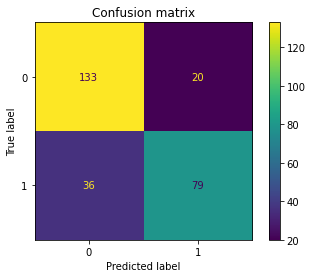

In [63]:
#using gini index
#create object
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1) 
#call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       153
           1       0.85      0.70      0.77       115

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



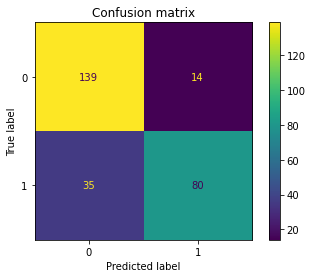

In [64]:
#using entropy
rfc=RandomForestClassifier(n_estimators=10,max_features=3,random_state=1,criterion='entropy')
#call function
rfc=create_model(rfc)

# ADA boosting - Adapter boosting

In [65]:
#apply AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       153
           1       0.75      0.63      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



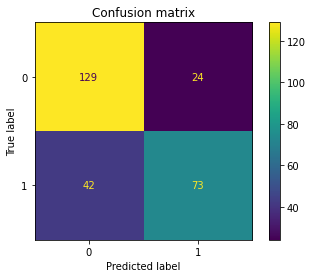

In [66]:
#create object
ada=AdaBoostClassifier(n_estimators=2,random_state=1)
#call function
ada=create_model(ada)

# Gradient Boosting

In [67]:
#to apply GradientBoostingClassifier on this dataset 
from sklearn.ensemble import GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       153
           1       0.84      0.61      0.71       115

    accuracy                           0.78       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268



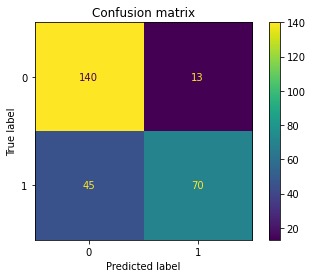

In [68]:
#create object of GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1,n_estimators=31) #n_estimators means no of iterations
#call function
gbc=create_model(gbc)

# Extreme Gradient Boosting (XGB)

In [69]:
#to apply XGBClassifier 
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       153
           1       0.81      0.62      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268



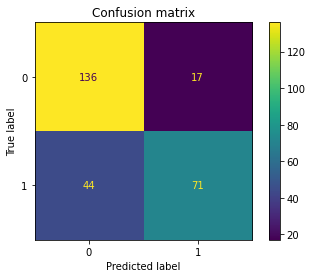

In [70]:
#create a object
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#call function
xgc=create_model(xgc)